   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
    Hours  Scores
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
Hours     0
Scores    0
dtype: int64


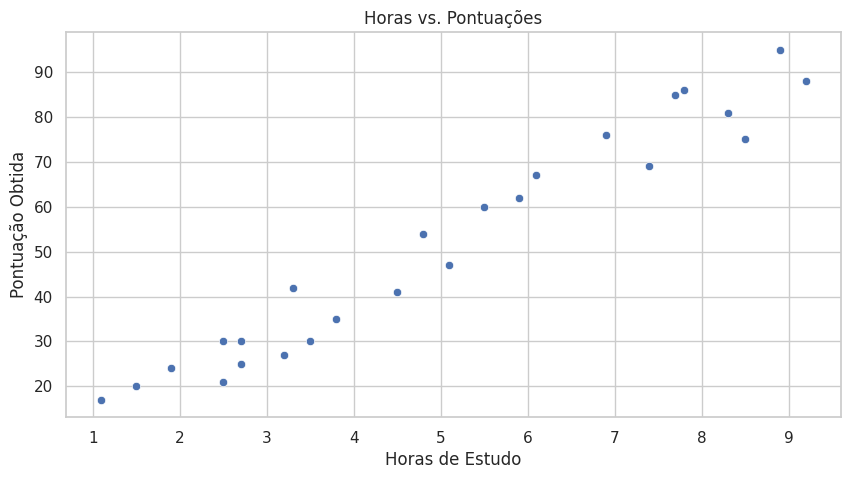

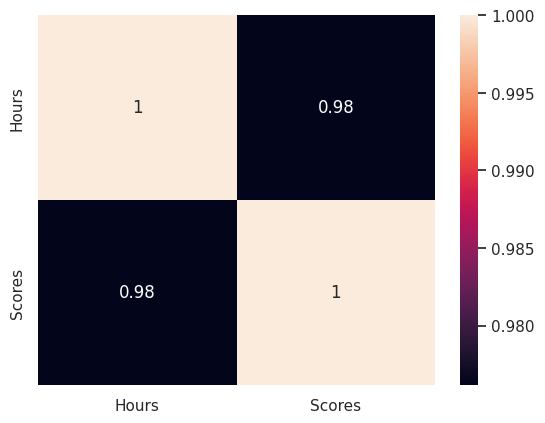

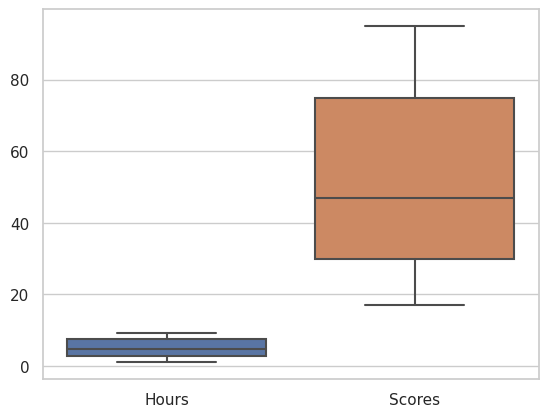

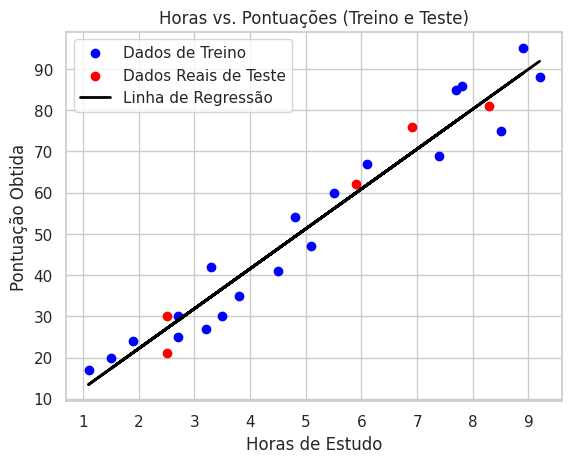

Erro Médio Absoluto (MAE): 3.9207511902099244
Erro Quadrático Médio (MSE): 18.943211722315272
Raiz do Erro Quadrático Médio (RMSE): 4.352380006653288
Coeficiente de Determinação (R²): 0.9678055545167994


In [35]:
from google.colab import files

import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('StudentScores.csv')

print(df.head(5))
print(df.tail(5))

#Analise
df.describe()

# Verificação de valores ausentes
print(df.isnull().sum())

# Plot dos dados para ver a relação entre horas e scores
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Hours', y='Scores', data=df)
plt.title('Horas vs. Pontuações')
plt.xlabel('Horas de Estudo')
plt.ylabel('Pontuação Obtida')
plt.show()

# Correlação entre as variaveis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

#Pré-processamento
#Verificação de outliers
sns.boxplot(data=df)
plt.show()

#Divisão dos dados
X = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Verificação de valores ausentes
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = imputer.fit_transform(X_train)

X_test = imputer.transform(X_test)

#Construção do modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

#Previsões
y_pred = model.predict(X_test)

plt.scatter(X_train, y_train, color = 'blue', label = 'Dados de Treino')
plt.scatter(X_test, y_test, color = 'red', label = 'Dados Reais de Teste')
plt.plot(X_train, model.predict(X_train), color = 'black', linewidth = 2, label = 'Linha de Regressão')
plt.title('Horas vs. Pontuações (Treino e Teste)')
plt.xlabel('Horas de Estudo')
plt.ylabel('Pontuação Obtida')
plt.legend()
plt.show()

#Avaliação do desepemnho
mae = mean_absolute_error(y_test, y_pred)
print(f"Erro Médio Absoluto (MAE): {mae}")

mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinação (R²): {r2}")
#Analisando as métricas, o modelo de regressão linear é eficaz para prever as pontuações com base nas horas estudadas, com um alto valor de R² e erros relativamente baixos em termos de MAE e RMSE.

